In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline

In [2]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [4]:
import string
import spacy
import nltk
from wordcloud import WordCloud

In [79]:
data=pd.read_csv("E:\\download\\Elon_musk.txt",error_bad_lines=False)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13776\3750690478.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv("E:\\download\\Elon_musk.txt",error_bad_lines=False)
b'Skipping line 16: expected 1 fields, saw 2\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 2\nSkipping line 27: expected 1 fields, saw 2\nSkipping line 31: expected 1 fields, saw 2\nSkipping line 37: expected 1 fields, saw 3\nSkipping line 44: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 3\nSkipping line 74: expected 1 fields, saw 2\nSkipping line 75: expected 1 fields, saw 2\nSkipping line 77: expected 1 fields, saw 3\nSkipping line 82: expected 1 fields, saw 2\nSkipping line 83: expected 1 fields, saw 3\nSkipping line 85: expected 1 fields, saw 2\nSkipping line 90: expected 1 fields, saw 2\nSkipping line 92: expected 1 fields, saw 3\nSkipping line 109

In [80]:
data

x
0                                @kunalb11 I’m an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1486   @vistacruiser7 @flcnhvy There’s some of that too
1487  @PPathole Make sure to read ur terms &amp; con...
1488                @TeslaGong @PPathole Samwise Gamgee
1489  @PPathole Altho Dumb and Dumber is <U+0001F525...
1490                          Progress update August 28

[1491 rows x 1 columns]

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       1491 non-null   object
dtypes: object(1)
memory usage: 11.8+ KB


There is no null values

In [82]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1486    False
1487    False
1488    False
1489    False
1490    False
Length: 1491, dtype: bool

In [83]:
data[data.duplicated()].shape

(2, 1)

In [85]:
data = data.drop_duplicates()

In [87]:
data[data.duplicated()].shape

(0, 1)

So now there is no duplicates values in the dataset

# Data cleaning

In [88]:
data = [x.strip() for x in data.x] # remove both the leading and the trailing characters
data = [x for x in data if x] # removes empty strings, because they are considered in Python as False
data[0:15]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\r\nAll thought he would fail,\r\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 '@freewalletorg Thanks for fixing']

In [89]:
# Joining the list into one string
text = ' '.join(data)
text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\r\nAll thought he would fail,\r\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won’t give you your private keys should be

In [90]:
# punctuation removal
no_punctuation_text = text.translate(str.maketrans('','',string.punctuation))
no_punctuation_text

'kunalb11 I’m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\r\nAll thought he would fail\r\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It’s getting real freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg Any crypto wallet that won’t give you your private keys should be avoided at all costs freewalletorg Your app sucks RT SpaceX NAS

In [14]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
# Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punctuation_text)
print(text_tokens[0:50])

['kunalb11', 'I', '’', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox']


In [92]:
len(text_tokens)

13447

In [93]:
# removing stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('its')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:50])


['kunalb11', 'I', '’', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10']


In [94]:
# Normalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:50])

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10']


In [95]:
# Stemming of the data
from nltk.stem import PorterStemmer
ps = PorterStemmer()
Stemmed_tokens = [ps.stem(word) for word in lower_words]
print(Stemmed_tokens[0:50])

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10']


In [21]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [97]:
nlp = spacy.load('en_core_web_sm')

In [98]:
# Lemmatization of the data
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:50])

kunalb11 I ’ alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10


In [99]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:30])

['kunalb11', 'I', "'", 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even']


# Feature Extraction

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [101]:
# BOW/Count Vectorizer
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

0
ðogecoin         3699
zzcool           3698
zwiebelbach      3697
zshauladventure  3696
zone             3695
zogfotpik        3694
zip2             3693
zikryzamir       3692
zero             3691
zeitma           3690
zealand          3689
zainraz4         3688
yup              3687
ystijd           3686
youyanggu        3685
yourfavgas       3684
yourfavga        3683
youranonnew      3682
your             3681
young            3680

In [102]:
print(vectorizer.vocabulary_)

{'kunalb11': 1966, 'alien': 157, 'idaacarmack': 1774, 'ray': 2669, 'trace': 3323, 'cyberpunk': 727, 'hdr': 1273, 'nextlevel': 2324, 'have': 1269, 'try': 3348, 'joerogan': 1899, 'spotify': 3027, 'great': 1224, 'interview': 1849, 'gtera27': 1237, 'doge': 844, 'underestimate': 3464, 'teslacn': 3194, 'congratulations': 652, 'tesla': 3188, 'china': 558, 'amazing': 178, 'execution': 1005, 'last': 1983, 'year': 3671, 'now': 2361, 'next': 2323, 'even': 983, 'happy': 1258, 'new': 2321, 'ox': 2436, 'httpstco9wfkmyu2oj': 1397, 'frodo': 1127, 'underdoge': 3463, 'all': 160, 'thought': 3262, 'would': 3651, 'fail': 1037, 'himself': 1310, 'httpstcozgxjfdzzrm': 1745, 'owensparks': 2435, 'flcnhvy': 1090, 'anonyx10': 202, 'haha': 1245, 'thank': 3225, 'indeed': 1810, 'tweets': 3364, 'definitely': 768, 'represent': 2722, 'realworld': 2688, 'time': 3276, 'allocation': 161, 'the': 3232, 'entertaining': 949, 'outcome': 2423, 'likely': 2032, 'givedirectly': 1197, 'just': 1921, 'send': 2857, 'agree': 132, 'club

In [103]:
print(vectorizer.get_feature_names()[60:120])
print(X.toarray()[60:120])

['45thspacewing', '48', '4d', '4th', '4thfromourstar', '50', '50k', '60', '65', '69420', '6f', '727', '727pm', '74', '78', '90', '9007', '922', '95', '99', 'able', 'aboard', 'about', 'above', 'absolutely', 'absorption', 'absurd', 'absurdly', 'academia', 'accelera', 'accelerate', 'accept', 'acceptable', 'access', 'accidental', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'acquisition', 'across', 'active', 'actual', 'actuall', 'actually', 'adagio', 'adamblitzer', 'adamhoov', 'adamkiotz', 'adamklotz', 'add', 'adding', 'address', 'adlanbogatyryov', 'adolfomorenos', 'advanc', 'advance', 'advanced']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [104]:
print(X.toarray().shape)

(10532, 3700)


# Word Cloud

In [40]:
from matplotlib.pyplot import imread
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(60,40))
    plt.imshow(wordcloud)
    plt.axis("off");

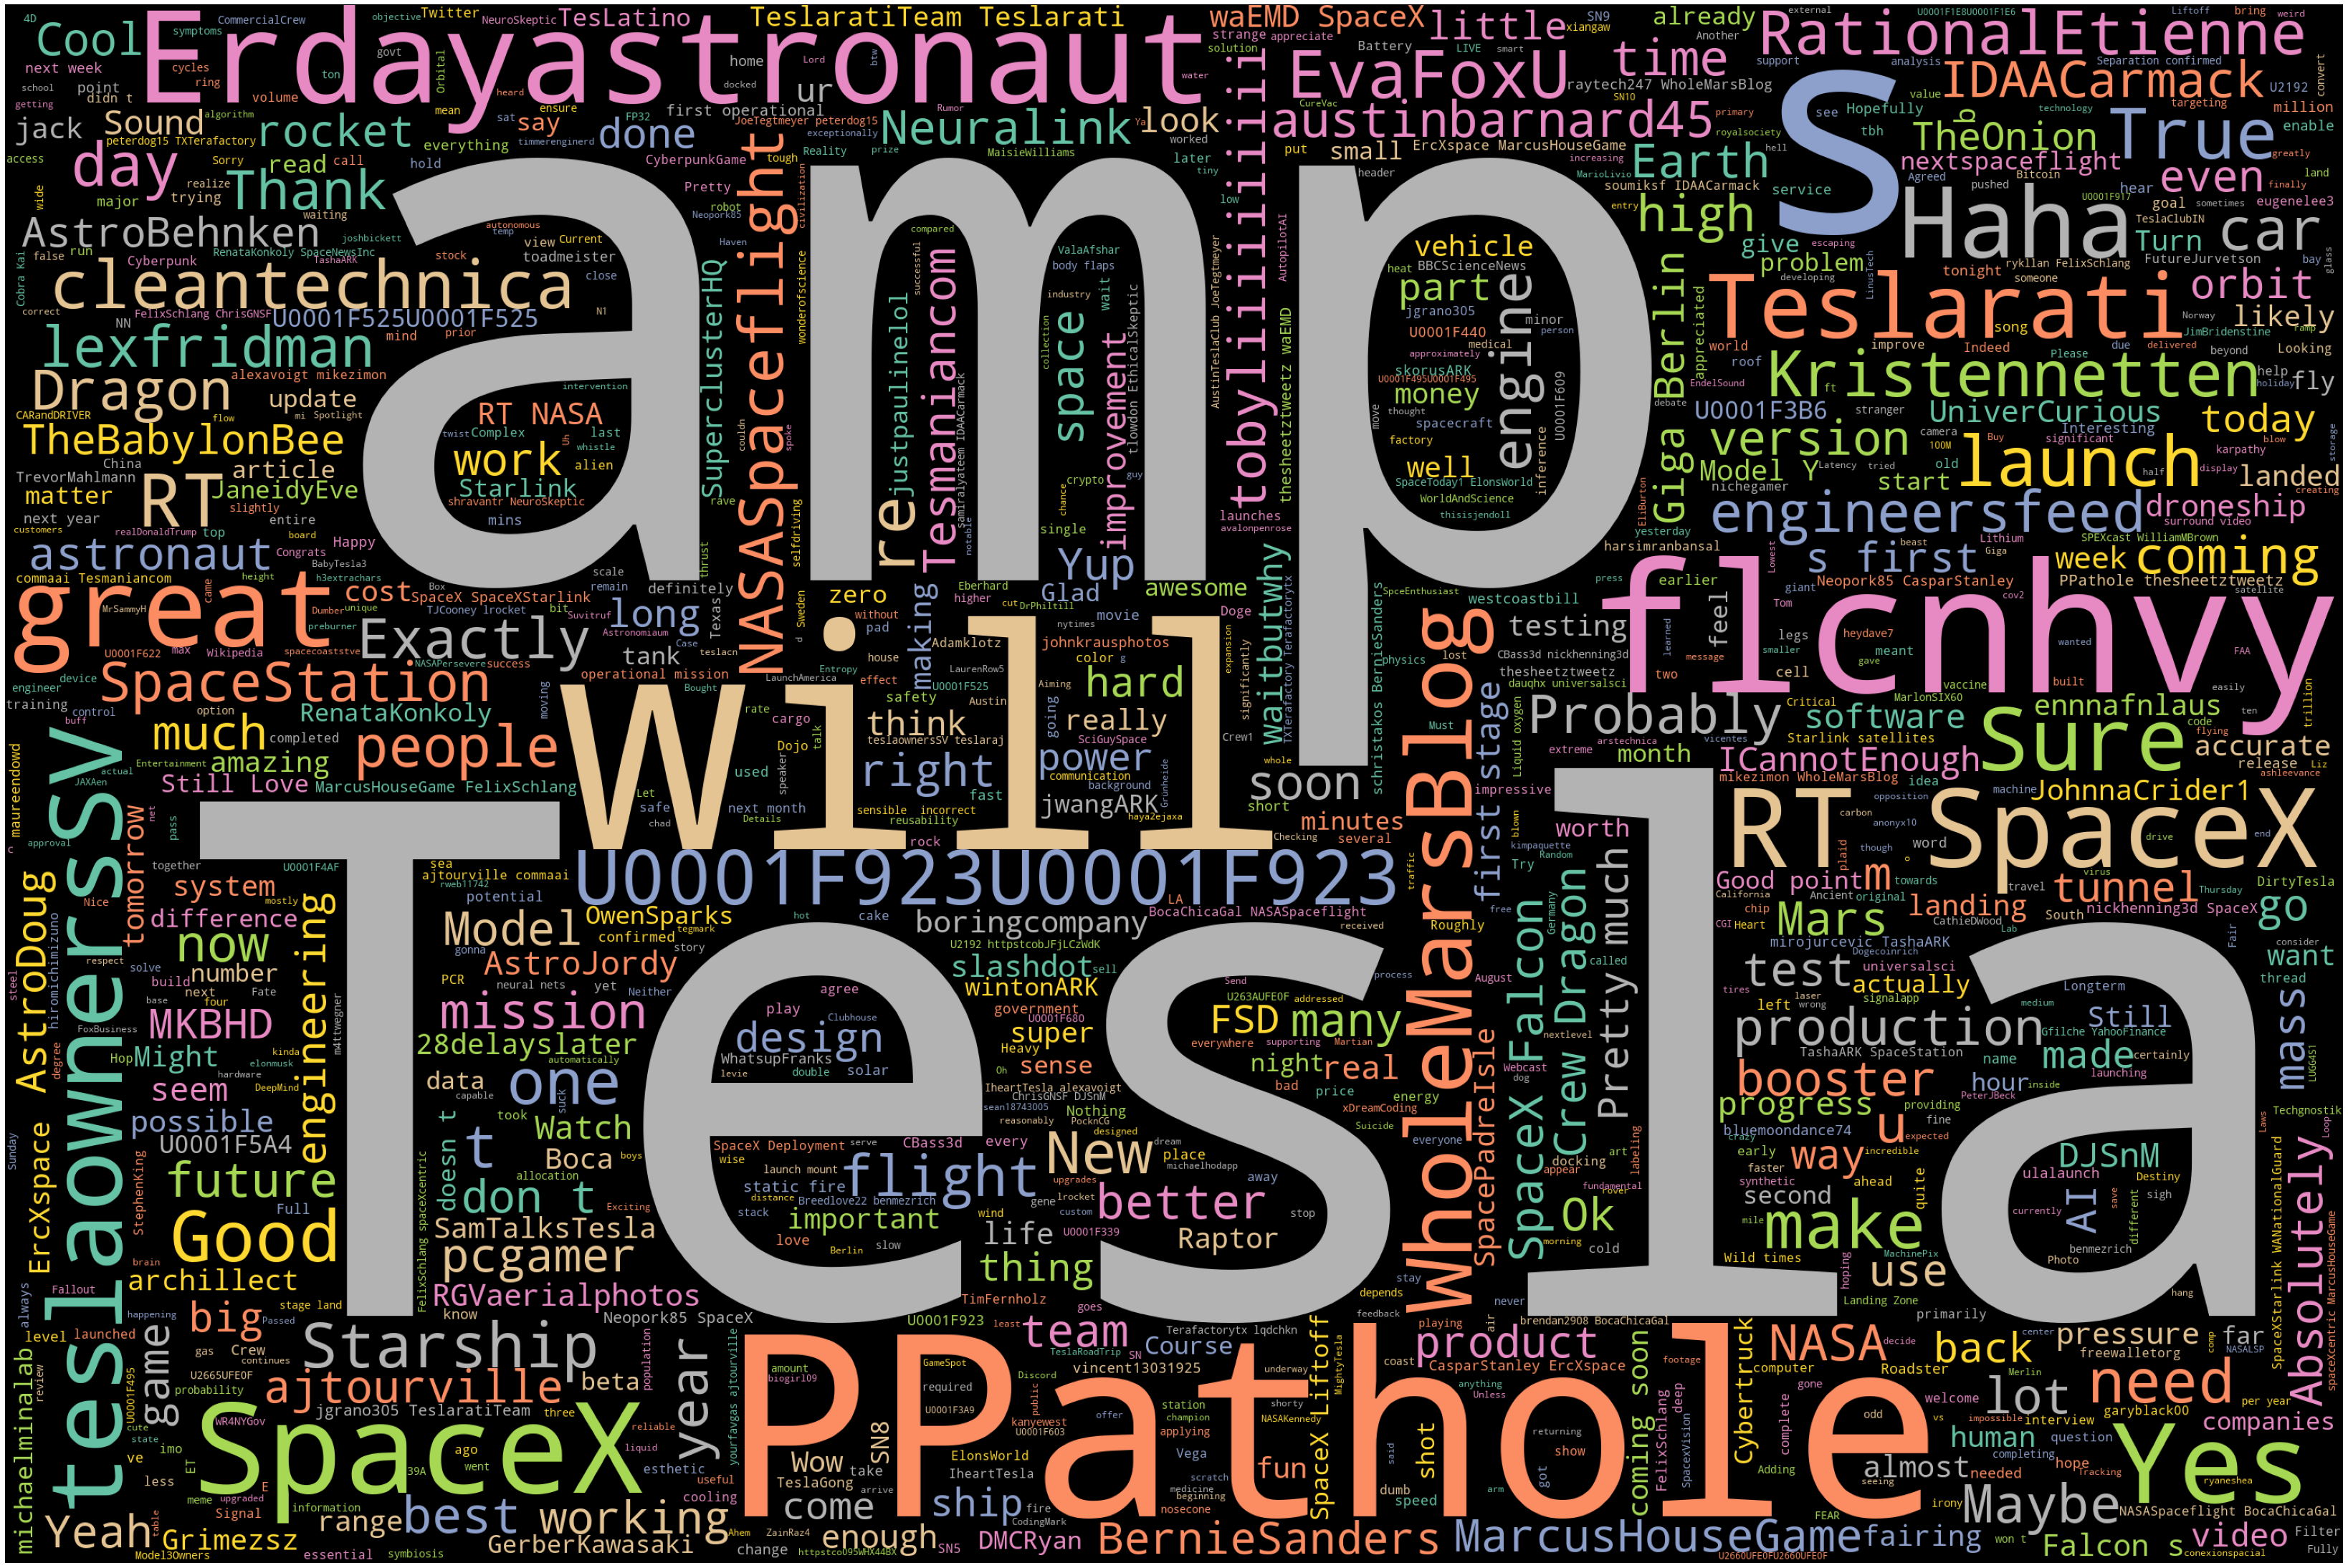

In [105]:
stopwords = STOPWORDS

wordcloud = WordCloud(width = 3000, height = 2000,
                     background_color = 'black',max_words = 1000,
                     colormap = 'Set2',stopwords = stopwords).generate(no_punctuation_text)
plot_cloud(wordcloud)

# Sentimental Analysis

In [109]:
data=pd.read_csv("E:\\download\\Elon_musk.txt",
                 error_bad_lines=False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13776\2792658732.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv("E:\\download\\Elon_musk.txt",
b'Skipping line 16: expected 1 fields, saw 2\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 2\nSkipping line 27: expected 1 fields, saw 2\nSkipping line 31: expected 1 fields, saw 2\nSkipping line 37: expected 1 fields, saw 3\nSkipping line 44: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 3\nSkipping line 74: expected 1 fields, saw 2\nSkipping line 75: expected 1 fields, saw 2\nSkipping line 77: expected 1 fields, saw 3\nSkipping line 82: expected 1 fields, saw 2\nSkipping line 83: expected 1 fields, saw 3\nSkipping line 85: expected 1 fields, saw 2\nSkipping line 90: expected 1 fields, saw 2\nSkipping line 92: expected 1 fields, saw 3\nSkipping line 109: expected 1 fields, s

In [110]:
data

x
0                                @kunalb11 I’m an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1486   @vistacruiser7 @flcnhvy There’s some of that too
1487  @PPathole Make sure to read ur terms &amp; con...
1488                @TeslaGong @PPathole Samwise Gamgee
1489  @PPathole Altho Dumb and Dumber is <U+0001F525...
1490                          Progress update August 28

[1491 rows x 1 columns]

In [111]:
data = [x.strip() for x in data.x] # remove both the leading and the trailing characters
data = [x for x in data if x] # removes empty strings, because they are considered in Python as False
data[0:15]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\r\nAll thought he would fail,\r\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 '@freewalletorg Thanks for fixing']

In [112]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_md')

one_block = data[4]
one_block
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [113]:
for token in doc_block:
    print(token, token.pos_)

@teslacn PROPN
Congratulations PROPN
Tesla PROPN
China PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
. PUNCT
Now ADV
on ADP
to ADP
the DET
next ADJ
for ADP
even ADV
more ADJ
! PUNCT
! PUNCT


In [114]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['execution', 'year']


In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
#Sentiment analysis
afinn = pd.read_csv('E:\download\\Afinn.csv', 
                    sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [54]:
afinn.head(20)

word  value
0      abandon     -2
1    abandoned     -2
2     abandons     -2
3     abducted     -2
4    abduction     -2
5   abductions     -2
6        abhor     -3
7     abhorred     -3
8    abhorrent     -3
9       abhors     -3
10   abilities      2
11     ability      2
12      aboard      1
13    absentee     -1
14   absentees     -1
15     absolve      2
16    absolved      2
17    absolves      2
18   absolving      2
19    absorbed      1

In [115]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[0:10]

['@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\r\nAll thought he would fail,\r\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won’t

In [116]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0    @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
610  @burakaydik True Best use of the term “Full St...
611                   @PPathole @IheartTesla For sure.
612               This is both great &amp; terrifying.
613  Everything we’ve ever sensed or thought has be...
614  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[615 rows x 1 columns]

In [117]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [57]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [118]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [119]:
sent_df

sentence  sentiment_value
0    @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...                0
1                                   Have you tried it?                0
2                  @joerogan @Spotify Great interview!                3
3    @gtera27 Doge is underestimated @teslacn Congr...                3
4                   Now on to the next for even more!!                0
..                                                 ...              ...
610  @burakaydik True Best use of the term “Full St...                3
611                   @PPathole @IheartTesla For sure.                0
612               This is both great &amp; terrifying.                3
613  Everything we’ve ever sensed or thought has be...                2
614  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0

[615 rows x 2 columns]

In [121]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df.head(10)

sentence  sentiment_value  \
0  @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...                0   
1                                 Have you tried it?                0   
2                @joerogan @Spotify Great interview!                3   
3  @gtera27 Doge is underestimated @teslacn Congr...                3   
4                 Now on to the next for even more!!                0   
5                          Happy New Year of the Ox!                0   
6  https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
7  https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...                2   
8  Tweets definitely do not represent real-world ...                0   
9  The most entertaining outcome is the most like...                5   

   word_count  
0          13  
1           4  
2           4  
3          13  
4           8  
5           6  
6          14  
7          10  
8           8  
9          84

In [122]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
591  Thanks Just stop @EvaFoxU <U+0001F495><U+0001F...                9   
505  Latter also s… https://t.co/dlMy5rybrK @NASASp...                9   
83   @BoredElonMusk <U+0001F923><U+0001F923> @erigg...                9   
474  That bs has been pushed by Eberhard (worst per...               10   
132  There’s some great AI out ther… https://t.co/v...               10   
182  @TheOnion @ID_AA_Carmack Yup @Forbes Caution s...               10   
64   @teslaownersSV This is a good one @MrBeastYT I...               13   
541  <U+0001F622> https://t.co/adojS2UCe3 @vistacru...               15   
386  @WholeMarsBlog Yes @BabyTesla3 @WholeMarsBlog ...               17   
29   @Adamklotz_ @Erdayastronaut @SpaceX Yes I am b...               19   

     word_count  
591          75  
505          91  
83           62  
474          91  
132          54  
182          66  
64           38  
541          73  
386          84  
29          161

In [123]:
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0    @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
610  @burakaydik True Best use of the term “Full St...                3   
611                   @PPathole @IheartTesla For sure.                0   
612               This is both great &amp; terrifying.                3   
613  Everything we’ve ever sensed or thought has be...                2   
614  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
610           9    610  
611           4    611  
612           6    612  
613          35    613  
614          15    614  

[615 rows x 4 columns]

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

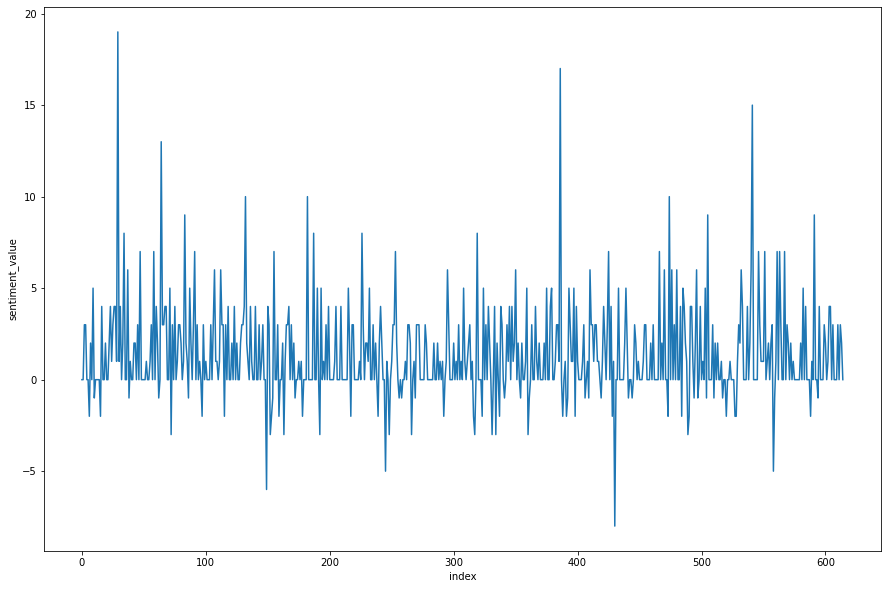

In [66]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

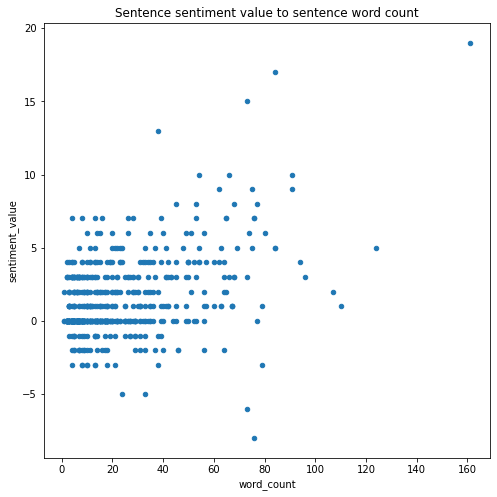

In [125]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), 
                     title='Sentence sentiment value to sentence word count')

From this we can infer that most of the word count are between 0 to 60 and sentiment value between -3 to 7. There are outlier also but they also have high sentiment value

# Question 2 Amazon Review data

In [68]:
data_1=pd.read_csv("E:\\download\\Amazon_review_data.txt",error_bad_lines=False)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13776\874699400.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_1=pd.read_csv("E:\\download\\Amazon_review_data.txt",error_bad_lines=False)
b'Skipping line 9: expected 1 fields, saw 3\nSkipping line 25: expected 1 fields, saw 2\nSkipping line 27: expected 1 fields, saw 2\nSkipping line 30: expected 1 fields, saw 4\nSkipping line 36: expected 1 fields, saw 2\nSkipping line 45: expected 1 fields, saw 2\nSkipping line 53: expected 1 fields, saw 2\nSkipping line 64: expected 1 fields, saw 3\nSkipping line 96: expected 1 fields, saw 2\nSkipping line 150: expected 1 fields, saw 2\nSkipping line 159: expected 1 fields, saw 2\nSkipping line 180: expected 1 fields, saw 2\nSkipping line 192: expected 1 fields, saw 2\nSkipping line 199: expected 1 fields, saw 3\nSkipping line 215: expected 1 fields, saw 2\nSkipping line 217: expected 1 fields, saw 2\nS

In [69]:
data_1

y
0    Disappointed with Oneplus, but more so with Am...
1            The worst One Plus phone ever\r\n        
2                     Good Budget Flagship\r\n        
3         ONEPLUS HAS LOST ITS ORIGINALITY\r\n        
4    was blade cut by FE or related staff box was o...
..                                                 ...
420                                          Very good
421                               Sexiest phone ever !
422                             A good all round phone
423                                       Overall nice
424                              Less than expectation

[425 rows x 1 columns]

In [70]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       425 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB


No null value is present

In [72]:
data_1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
420    False
421    False
422    False
423    False
424    False
Length: 425, dtype: bool

In [75]:
data_1.shape

(425, 1)

In [74]:
data_1[data_1.duplicated()].shape

(192, 1)

In [76]:
data_2 = data_1.drop_duplicates()

In [77]:
data_2

y
0    Disappointed with Oneplus, but more so with Am...
1            The worst One Plus phone ever\r\n        
2                     Good Budget Flagship\r\n        
3         ONEPLUS HAS LOST ITS ORIGINALITY\r\n        
4    was blade cut by FE or related staff box was o...
..                                                 ...
420                                          Very good
421                               Sexiest phone ever !
422                             A good all round phone
423                                       Overall nice
424                              Less than expectation

[233 rows x 1 columns]

In [78]:
data_2[data_2.duplicated()].shape

(0, 1)

# Data Cleaning

In [108]:
data_2 = [y.strip() for y in data_2.y] # remove both the leading and the trailing characters
data_2 = [y for y in data_2 if y] # removes empty strings, because they are considered in Python as False
data_2[0:15]

['Disappointed with Oneplus, but more so with Amazon',
 'The worst One Plus phone ever',
 'Good Budget Flagship',
 'ONEPLUS HAS LOST ITS ORIGINALITY',
 'was blade cut by FE or related staff box was open it seems trying to theft the mobile',
 'Avoid avoid avoid',
 'Good but not the best',
 'Worst camera quality - Adding additional makeup while taking photo.',
 "I am a OnePlus fan but didn't like this phone",
 'Decent phone in this price range',
 'Overall a good phone.',
 'A "different" OnePlus',
 'Not a flagship level phone at this price range.',
 'Not a premium phone',
 'Not good as thought']

In [127]:
# Joining the list into one string
text = ' '.join(data_2)
text

'Disappointed with Oneplus, but more so with Amazon The worst One Plus phone ever Good Budget Flagship ONEPLUS HAS LOST ITS ORIGINALITY was blade cut by FE or related staff box was open it seems trying to theft the mobile Avoid avoid avoid Good but not the best Worst camera quality - Adding additional makeup while taking photo. I am a OnePlus fan but didn\'t like this phone Decent phone in this price range Overall a good phone. A "different" OnePlus Not a flagship level phone at this price range. Not a premium phone Not good as thought Good Average Buy.... Battery drains very fast Not a OnePlus flagship phone for sure Felt being cheated to with the camera quality at 43000 Rs. Lines are displayed sometimes on screen & power button is automatically pressed. Happy with the purchase Recieved defective item The most beautiful OnePlus Camera is not upto the mark Disappointed by 10R AWESOME ONEPLUS SMARTPHONE Not worth the money Pathetic camera Not worth it buying..... Its really good but hea

In [128]:
# punctuation removal
no_punctuation_text = text.translate(str.maketrans('','',string.punctuation))
no_punctuation_text

'Disappointed with Oneplus but more so with Amazon The worst One Plus phone ever Good Budget Flagship ONEPLUS HAS LOST ITS ORIGINALITY was blade cut by FE or related staff box was open it seems trying to theft the mobile Avoid avoid avoid Good but not the best Worst camera quality  Adding additional makeup while taking photo I am a OnePlus fan but didnt like this phone Decent phone in this price range Overall a good phone A different OnePlus Not a flagship level phone at this price range Not a premium phone Not good as thought Good Average Buy Battery drains very fast Not a OnePlus flagship phone for sure Felt being cheated to with the camera quality at 43000 Rs Lines are displayed sometimes on screen  power button is automatically pressed Happy with the purchase Recieved defective item The most beautiful OnePlus Camera is not upto the mark Disappointed by 10R AWESOME ONEPLUS SMARTPHONE Not worth the money Pathetic camera Not worth it buying Its really good but heating issue ho rha h a

In [129]:
# Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punctuation_text)
print(text_tokens[0:50])

['Disappointed', 'with', 'Oneplus', 'but', 'more', 'so', 'with', 'Amazon', 'The', 'worst', 'One', 'Plus', 'phone', 'ever', 'Good', 'Budget', 'Flagship', 'ONEPLUS', 'HAS', 'LOST', 'ITS', 'ORIGINALITY', 'was', 'blade', 'cut', 'by', 'FE', 'or', 'related', 'staff', 'box', 'was', 'open', 'it', 'seems', 'trying', 'to', 'theft', 'the', 'mobile', 'Avoid', 'avoid', 'avoid', 'Good', 'but', 'not', 'the', 'best', 'Worst', 'camera']


In [130]:
len(text_tokens)

1110

In [131]:
# removing stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('its')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:50])


['Disappointed', 'Oneplus', 'Amazon', 'The', 'worst', 'One', 'Plus', 'phone', 'ever', 'Good', 'Budget', 'Flagship', 'ONEPLUS', 'HAS', 'LOST', 'ITS', 'ORIGINALITY', 'blade', 'cut', 'FE', 'related', 'staff', 'box', 'open', 'seems', 'trying', 'theft', 'mobile', 'Avoid', 'avoid', 'avoid', 'Good', 'best', 'Worst', 'camera', 'quality', 'Adding', 'additional', 'makeup', 'taking', 'photo', 'I', 'OnePlus', 'fan', 'didnt', 'like', 'phone', 'Decent', 'phone', 'price']


In [132]:
# Normalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:50])

['disappointed', 'oneplus', 'amazon', 'the', 'worst', 'one', 'plus', 'phone', 'ever', 'good', 'budget', 'flagship', 'oneplus', 'has', 'lost', 'its', 'originality', 'blade', 'cut', 'fe', 'related', 'staff', 'box', 'open', 'seems', 'trying', 'theft', 'mobile', 'avoid', 'avoid', 'avoid', 'good', 'best', 'worst', 'camera', 'quality', 'adding', 'additional', 'makeup', 'taking', 'photo', 'i', 'oneplus', 'fan', 'didnt', 'like', 'phone', 'decent', 'phone', 'price']


In [133]:
# Stemming of the data
from nltk.stem import PorterStemmer
ps = PorterStemmer()
Stemmed_tokens = [ps.stem(word) for word in lower_words]
print(Stemmed_tokens[0:50])

['disappoint', 'oneplu', 'amazon', 'the', 'worst', 'one', 'plu', 'phone', 'ever', 'good', 'budget', 'flagship', 'oneplu', 'ha', 'lost', 'it', 'origin', 'blade', 'cut', 'fe', 'relat', 'staff', 'box', 'open', 'seem', 'tri', 'theft', 'mobil', 'avoid', 'avoid', 'avoid', 'good', 'best', 'worst', 'camera', 'qualiti', 'ad', 'addit', 'makeup', 'take', 'photo', 'i', 'oneplu', 'fan', 'didnt', 'like', 'phone', 'decent', 'phone', 'price']


In [137]:
# Lemmatization of the data
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:50])

Disappointed Oneplus Amazon The worst One Plus phone ever Good Budget Flagship ONEPLUS HAS LOST ITS ORIGINALITY blade cut FE related staff box open seems trying theft mobile Avoid avoid avoid Good best Worst camera quality Adding additional makeup taking photo I OnePlus fan didnt like phone Decent phone


In [138]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:30])

['disappointed', 'Oneplus', 'Amazon', 'the', 'bad', 'one', 'plus', 'phone', 'ever', 'Good', 'Budget', 'Flagship', 'ONEPLUS', 'have', 'lost', 'its', 'originality', 'blade', 'cut', 'FE', 'relate', 'staff', 'box', 'open', 'seem', 'try', 'theft', 'mobile', 'avoid', 'avoid']


# Feature Extraction

In [140]:
# from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [141]:
# BOW/Count Vectorizer
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

0
you      333
year     332
worth    331
worrast  330
work     329
without  328
well     327
weightn  326
weight   325
we       324
watt     323
waste    322
want     321
volume   320
voice    319
vestige  318
very     317
vasul    316
vary     315
varient  314

In [142]:
print(vectorizer.vocabulary_)

{'disappointed': 91, 'oneplus': 204, 'amazon': 26, 'the': 298, 'bad': 42, 'one': 203, 'plus': 228, 'phone': 221, 'ever': 101, 'good': 134, 'budget': 56, 'flagship': 121, 'have': 141, 'lost': 171, 'its': 158, 'originality': 209, 'blade': 52, 'cut': 79, 'fe': 114, 'relate': 251, 'staff': 286, 'box': 54, 'open': 205, 'seem': 266, 'try': 308, 'theft': 299, 'mobile': 186, 'avoid': 33, 'camera': 62, 'quality': 243, 'add': 20, 'additional': 21, 'makeup': 177, 'take': 293, 'photo': 223, 'fan': 110, 'do': 95, 'not': 199, 'like': 165, 'decent': 83, 'price': 234, 'range': 245, 'overall': 212, 'different': 89, 'level': 162, 'premium': 232, 'think': 301, 'average': 32, 'buy': 61, 'battery': 43, 'drain': 97, 'fast': 112, 'sure': 291, 'felt': 116, 'cheat': 69, '43000': 11, 'line': 166, 'display': 93, 'sometimes': 279, 'screen': 263, 'power': 231, 'button': 60, 'automatically': 30, 'press': 233, 'happy': 140, 'purchase': 242, 'recieve': 249, 'defective': 84, 'item': 157, 'beautiful': 48, 'upto': 311, 

In [143]:
print(vectorizer.get_feature_names()[60:120])
print(X.toarray()[60:120])

['button', 'buy', 'camera', 'careless', 'cemra', 'change', 'charge', 'charger', 'charging', 'cheat', 'china', 'classy', 'compact', 'company', 'consider', 'continuously', 'cost', 'could', 'customer', 'cut', 'day', 'deal', 'death', 'decent', 'defective', 'definitely', 'design', 'destroy', 'device', 'different', 'disappoint', 'disappointed', 'disappointment', 'display', 'disruption', 'do', 'donot', 'drain', 'end', 'enterprise', 'even', 'ever', 'every', 'exallent', 'excellent', 'exchange', 'expect', 'expectation', 'experience', 'fake', 'fan', 'far', 'fast', 'faster', 'fe', 'feature', 'felt', 'fentastic', 'fill', 'find']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [144]:
print(X.toarray().shape)

(884, 334)


# Word Cloud

In [145]:
from matplotlib.pyplot import imread
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(60,40))
    plt.imshow(wordcloud)
    plt.axis("off");

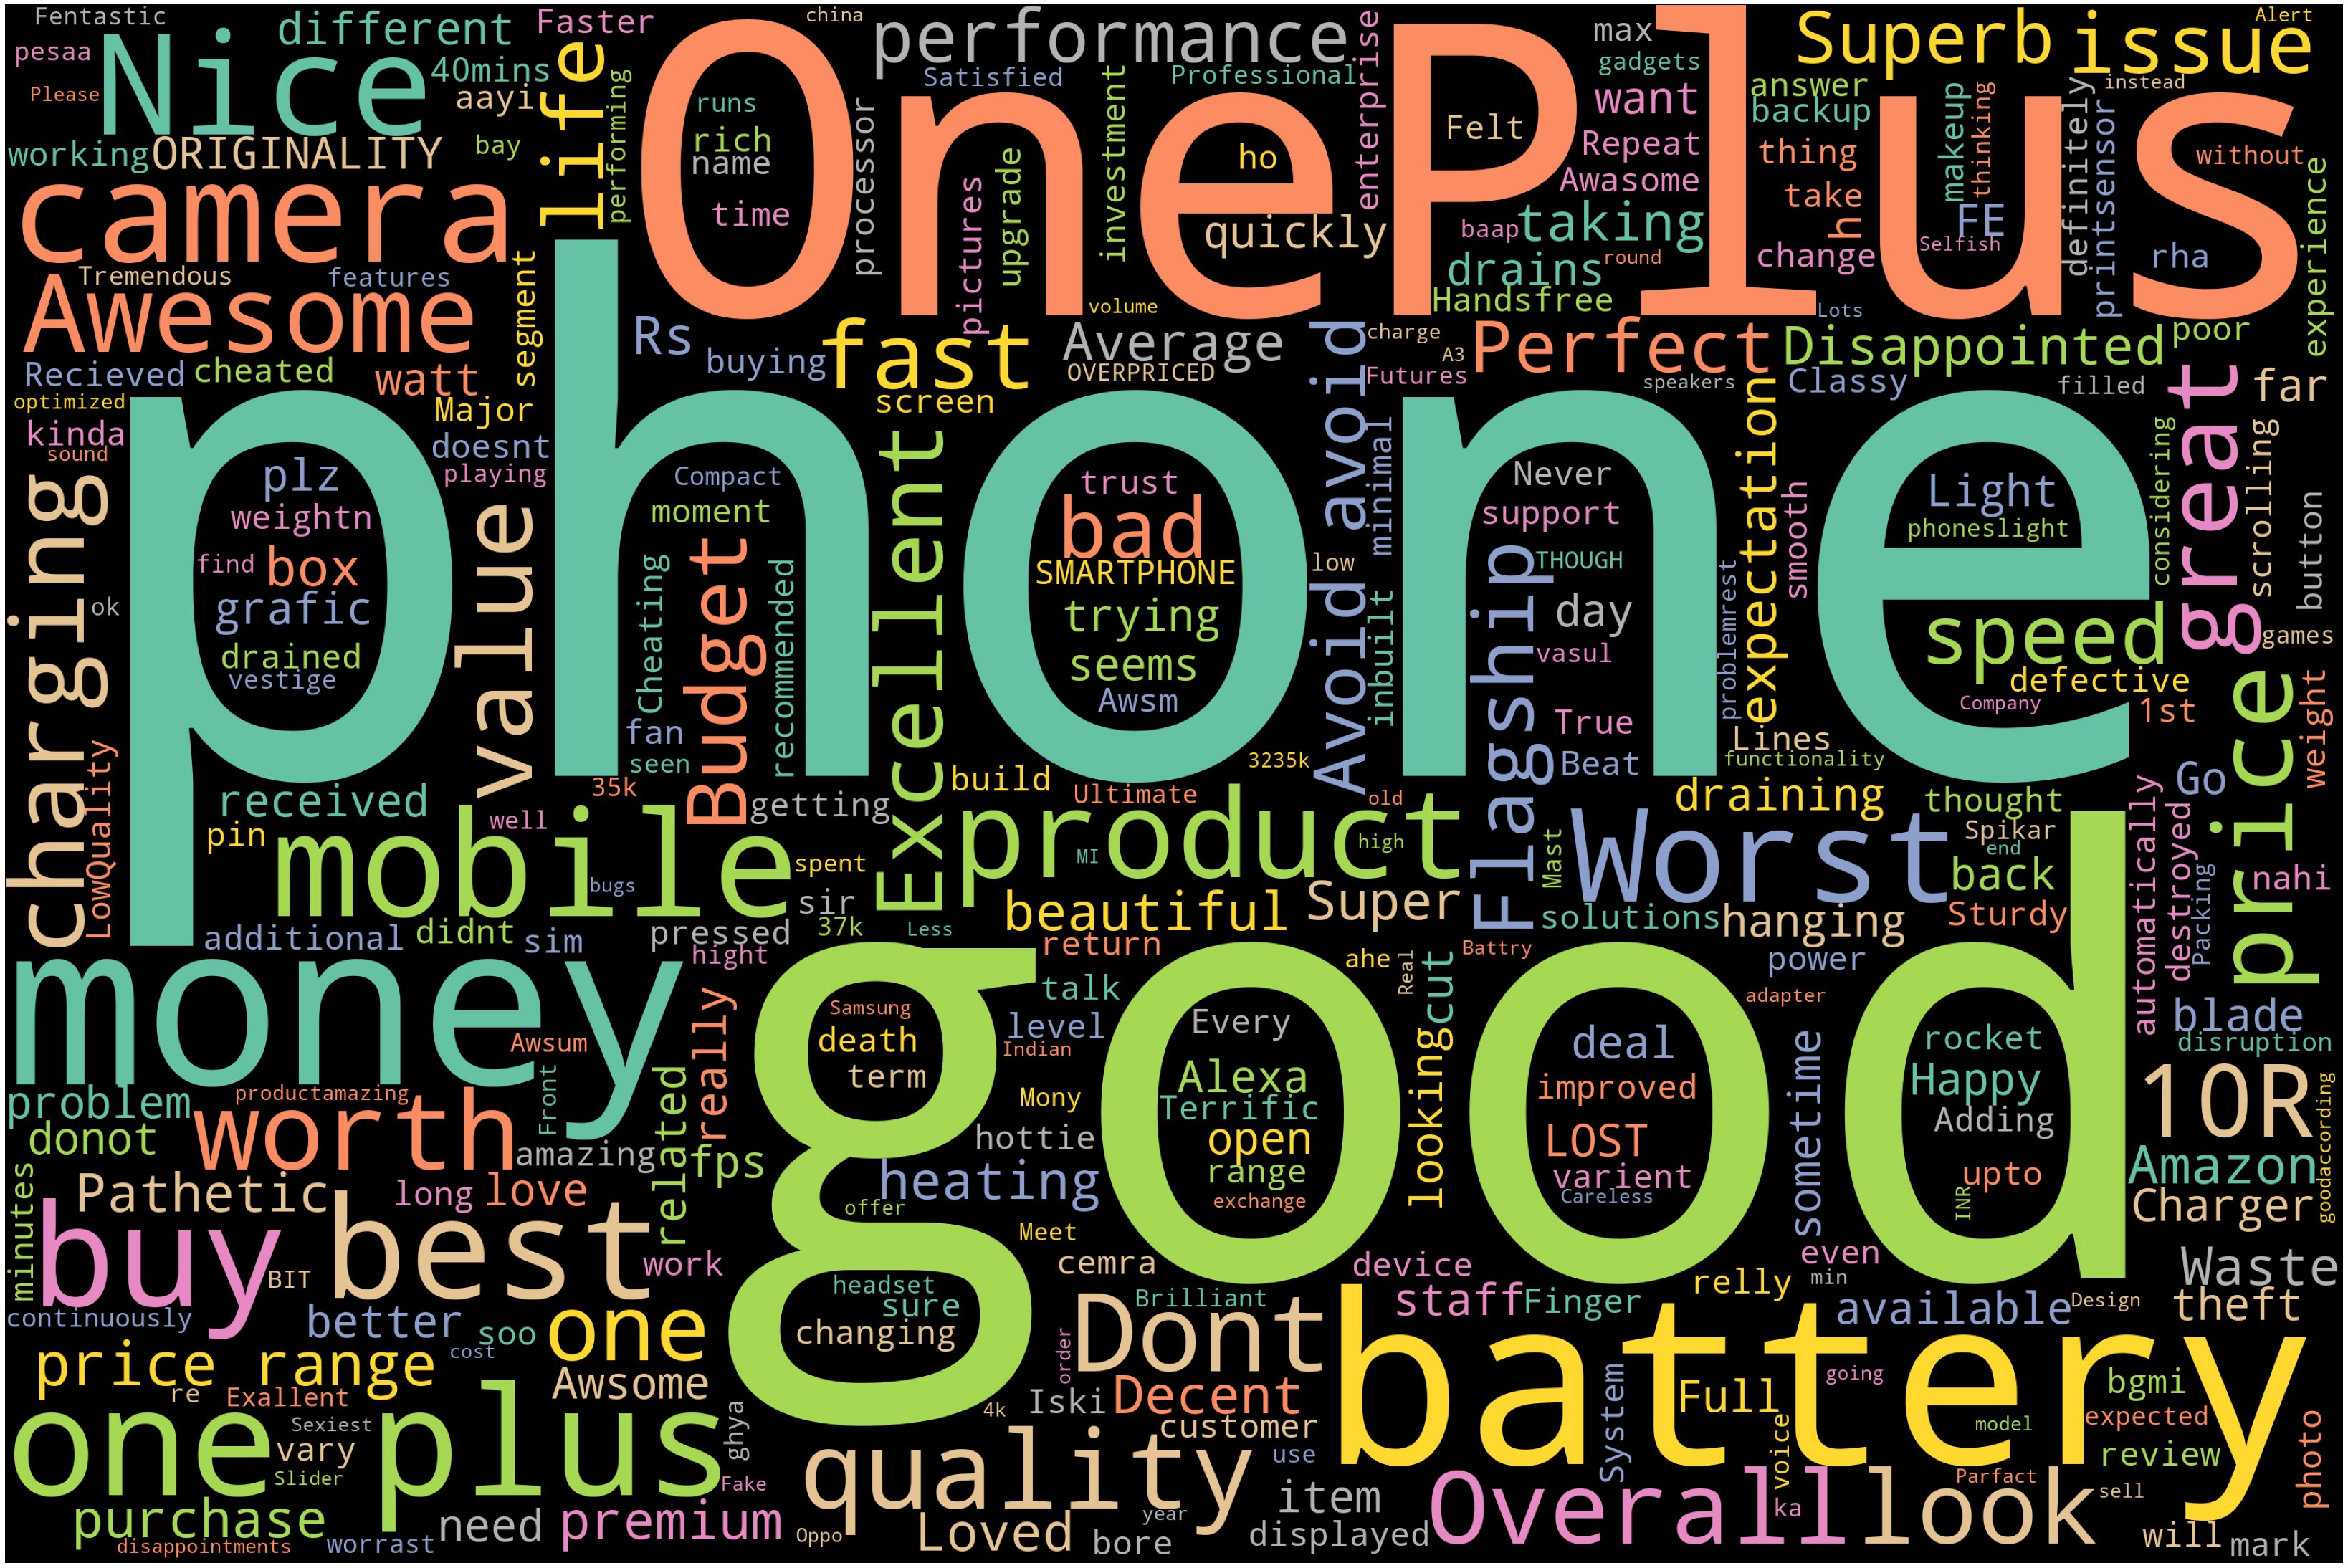

In [146]:
stopwords = STOPWORDS

wordcloud = WordCloud(width = 3000, height = 2000,
                     background_color = 'black',max_words = 1000,
                     colormap = 'Set2',stopwords = stopwords).generate(no_punctuation_text)
plot_cloud(wordcloud)

# Emotion Mining

In [147]:
data_2

['Disappointed with Oneplus, but more so with Amazon',
 'The worst One Plus phone ever',
 'Good Budget Flagship',
 'ONEPLUS HAS LOST ITS ORIGINALITY',
 'was blade cut by FE or related staff box was open it seems trying to theft the mobile',
 'Avoid avoid avoid',
 'Good but not the best',
 'Worst camera quality - Adding additional makeup while taking photo.',
 "I am a OnePlus fan but didn't like this phone",
 'Decent phone in this price range',
 'Overall a good phone.',
 'A "different" OnePlus',
 'Not a flagship level phone at this price range.',
 'Not a premium phone',
 'Not good as thought',
 'Good',
 'Average Buy....',
 'Battery drains very fast',
 'Not a OnePlus flagship phone for sure',
 'Felt being cheated to with the camera quality at 43000 Rs.',
 'Lines are displayed sometimes on screen & power button is automatically pressed.',
 'Happy with the purchase',
 'Recieved defective item',
 'The most beautiful OnePlus',
 'Camera is not upto the mark',
 'Disappointed by 10R',
 'AWESOME

In [148]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_md')

one_block = data_2[4]
one_block
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [149]:
for token in doc_block:
    print(token, token.pos_)

was AUX
blade NOUN
cut VERB
by ADP
FE PROPN
or CCONJ
related ADJ
staff NOUN
box NOUN
was AUX
open ADJ
it PRON
seems VERB
trying VERB
to PART
theft VERB
the DET
mobile NOUN


In [150]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['blade', 'cut', 'staff', 'box', 'seems', 'trying', 'theft', 'mobile']


In [151]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [152]:
afinn = pd.read_csv('E:\download\\Afinn.csv', 
                    sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [153]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data_2))
sentences[0:10]

['Disappointed with Oneplus, but more so with Amazon The worst One Plus phone ever Good Budget Flagship ONEPLUS HAS LOST ITS ORIGINALITY was blade cut by FE or related staff box was open it seems trying to theft the mobile Avoid avoid avoid Good but not the best Worst camera quality - Adding additional makeup while taking photo.',
 "I am a OnePlus fan but didn't like this phone Decent phone in this price range Overall a good phone.",
 'A "different" OnePlus Not a flagship level phone at this price range.',
 'Not a premium phone Not good as thought Good Average Buy....',
 'Battery drains very fast Not a OnePlus flagship phone for sure Felt being cheated to with the camera quality at 43000 Rs.',
 'Lines are displayed sometimes on screen & power button is automatically pressed.',
 'Happy with the purchase Recieved defective item The most beautiful OnePlus Camera is not upto the mark Disappointed by 10R AWESOME ONEPLUS SMARTPHONE Not worth the money Pathetic camera Not worth it buying.....

In [154]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0   Disappointed with Oneplus, but more so with Am...
1   I am a OnePlus fan but didn't like this phone ...
2   A "different" OnePlus Not a flagship level pho...
3   Not a premium phone Not good as thought Good A...
4   Battery drains very fast Not a OnePlus flagshi...
5   Lines are displayed sometimes on screen & powe...
6   Happy with the purchase Recieved defective ite...
7                                          Don't buy.
8               Really bad experience Awesome Phone .
9                       Charger 150 watt vary Faster.
10                                      Beat product.
11  Awesome device Battery 🔋 drains very fast Ever...
12  Major issue does not support enterprise soluti...
13  Terrific purchase Super speed charging and gre...
14                                    So far so good.
15           Charging Nice phone on this price range.
16  Cheating on varient Good phone with best batte...
17     Phone charging take max 40mins from 0 to 100%.
18             Excellent camera but bad battery life.
19  Good phone with great processor or charging sp...
20  Iski sim pin nahi aayi h sir One plus 10R Nice...
21                     One plus destroyed his name...
22                      This phone have some problem.
23  Not recommended No more one plus ...no more a ...
24  Nice look best performance with 2 days battery...
25               Alexa inbuilt doesn't work sometime.
26  Overall Good Phone It's good System is hanging...
27  The battery runs very quickly Mony vestige Sup...
28                             Full pesaa vasul item.
29  Price is more considering features The worst p...
30  Perfect mobile for Professional More value for...
31                       Compact And Speed......!!!!!
32  !💖❤️🔆 Best in budget Very good phone in price ...
33  Superb mobile ✌️✨🌟 Fentastic mobile you can bu...
34  Nice phone loved it Awesome phone Good Looking...
35               But headset should be filled in box.
36  good but not the best Overall it's good The wo...
37  Very good mobile 👍 Mobile ka baap Nice product...
38           Full charge in just 18 min Awsome Phone!
39                                       Awsome Look!
40  Phone is not optimized for some of the functio...
41        It's a good phone with few disappointments.
42           Waste of Money 💰 Don't waste your money!
43      Go for OnePlus 9 Indian money going to china.
44  Avoid at all cost Perfect mobile in this price...
45  Nice Phone in the range 4k 60 fps not availabl...
46  Beautiful Design Awesome mobile Don't buy it O...
47  A good all round phone Overall nice Less than ...

In [155]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [156]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [157]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

sentence  sentiment_value
0   Disappointed with Oneplus, but more so with Am...              -12
1   I am a OnePlus fan but didn't like this phone ...                8
2   A "different" OnePlus Not a flagship level pho...                2
3   Not a premium phone Not good as thought Good A...                3
4   Battery drains very fast Not a OnePlus flagshi...               -1
5   Lines are displayed sometimes on screen & powe...                0
6   Happy with the purchase Recieved defective ite...               19
7                                          Don't buy.                0
8               Really bad experience Awesome Phone .               -3
9                       Charger 150 watt vary Faster.                0
10                                      Beat product.                0
11  Awesome device Battery 🔋 drains very fast Ever...                7
12  Major issue does not support enterprise soluti...                9
13  Terrific purchase Super speed charging and gre...               13
14                                    So far so good.                3
15           Charging Nice phone on this price range.                3
16  Cheating on varient Good phone with best batte...                3
17     Phone charging take max 40mins from 0 to 100%.                0
18             Excellent camera but bad battery life.                0
19  Good phone with great processor or charging sp...                6
20  Iski sim pin nahi aayi h sir One plus 10R Nice...                9
21                     One plus destroyed his name...               -3
22                      This phone have some problem.               -2
23  Not recommended No more one plus ...no more a ...               15
24  Nice look best performance with 2 days battery...                9
25               Alexa inbuilt doesn't work sometime.                0
26  Overall Good Phone It's good System is hanging...                6
27  The battery runs very quickly Mony vestige Sup...               12
28                             Full pesaa vasul item.                0
29  Price is more considering features The worst p...               -3
30  Perfect mobile for Professional More value for...               16
31                       Compact And Speed......!!!!!                0
32  !💖❤️🔆 Best in budget Very good phone in price ...               20
33  Superb mobile ✌️✨🌟 Fentastic mobile you can bu...                4
34  Nice phone loved it Awesome phone Good Looking...               10
35               But headset should be filled in box.                0
36  good but not the best Overall it's good The wo...               -4
37  Very good mobile 👍 Mobile ka baap Nice product...               38
38           Full charge in just 18 min Awsome Phone!                0
39                                       Awsome Look!                0
40  Phone is not optimized for some of the functio...                0
41        It's a good phone with few disappointments.                1
42           Waste of Money 💰 Don't waste your money!               -2
43      Go for OnePlus 9 Indian money going to china.                0
44  Avoid at all cost Perfect mobile in this price...               -7
45  Nice Phone in the range 4k 60 fps not availabl...               -6
46  Beautiful Design Awesome mobile Don't buy it O...                9
47  A good all round phone Overall nice Less than ...                6

In [158]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df.head(10)

sentence  sentiment_value  \
0  Disappointed with Oneplus, but more so with Am...              -12   
1  I am a OnePlus fan but didn't like this phone ...                8   
2  A "different" OnePlus Not a flagship level pho...                2   
3  Not a premium phone Not good as thought Good A...                3   
4  Battery drains very fast Not a OnePlus flagshi...               -1   
5  Lines are displayed sometimes on screen & powe...                0   
6  Happy with the purchase Recieved defective ite...               19   
7                                         Don't buy.                0   
8              Really bad experience Awesome Phone .               -3   
9                      Charger 150 watt vary Faster.                0   

   word_count  
0          58  
1          20  
2          12  
3          11  
4          22  
5          12  
6          61  
7           2  
8           6  
9           5

In [159]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
20  Iski sim pin nahi aayi h sir One plus 10R Nice...                9   
12  Major issue does not support enterprise soluti...                9   
34  Nice phone loved it Awesome phone Good Looking...               10   
27  The battery runs very quickly Mony vestige Sup...               12   
13  Terrific purchase Super speed charging and gre...               13   
23  Not recommended No more one plus ...no more a ...               15   
30  Perfect mobile for Professional More value for...               16   
6   Happy with the purchase Recieved defective ite...               19   
32  !💖❤️🔆 Best in budget Very good phone in price ...               20   
37  Very good mobile 👍 Mobile ka baap Nice product...               38   

    word_count  
20          44  
12          22  
34          10  
27          39  
13         100  
23          43  
30          22  
6           61  
32          62  
37          71

In [160]:
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0   Disappointed with Oneplus, but more so with Am...              -12   
1   I am a OnePlus fan but didn't like this phone ...                8   
2   A "different" OnePlus Not a flagship level pho...                2   
3   Not a premium phone Not good as thought Good A...                3   
4   Battery drains very fast Not a OnePlus flagshi...               -1   
5   Lines are displayed sometimes on screen & powe...                0   
6   Happy with the purchase Recieved defective ite...               19   
7                                          Don't buy.                0   
8               Really bad experience Awesome Phone .               -3   
9                       Charger 150 watt vary Faster.                0   
10                                      Beat product.                0   
11  Awesome device Battery 🔋 drains very fast Ever...                7   
12  Major issue does not support enterprise soluti...                9   
13  Terrific purchase Super speed charging and gre...               13   
14                                    So far so good.                3   
15           Charging Nice phone on this price range.                3   
16  Cheating on varient Good phone with best batte...                3   
17     Phone charging take max 40mins from 0 to 100%.                0   
18             Excellent camera but bad battery life.                0   
19  Good phone with great processor or charging sp...                6   
20  Iski sim pin nahi aayi h sir One plus 10R Nice...                9   
21                     One plus destroyed his name...               -3   
22                      This phone have some problem.               -2   
23  Not recommended No more one plus ...no more a ...               15   
24  Nice look best performance with 2 days battery...                9   
25               Alexa inbuilt doesn't work sometime.                0   
26  Overall Good Phone It's good System is hanging...                6   
27  The battery runs very quickly Mony vestige Sup...               12   
28                             Full pesaa vasul item.                0   
29  Price is more considering features The worst p...               -3   
30  Perfect mobile for Professional More value for...               16   
31                       Compact And Speed......!!!!!                0   
32  !💖❤️🔆 Best in budget Very good phone in price ...               20   
33  Superb mobile ✌️✨🌟 Fentastic mobile you can bu...                4   
34  Nice phone loved it Awesome phone Good Looking...               10   
35               But headset should be filled in box.                0   
36  good but not the best Overall it's good The wo...               -4   
37  Very good mobile 👍 Mobile ka baap Nice product...               38   
38           Full charge in just 18 min Awsome Phone!                0   
39                                       Awsome Look!                0   
40  Phone is not optimized for some of the functio...                0   
41        It's a good phone with few disappointments.                1   
42           Waste of Money 💰 Don't waste your money!               -2   
43      Go for OnePlus 9 Indian money going to china.                0   
44  Avoid at all cost Perfect mobile in this price...               -7   
45  Nice Phone in the range 4k 60 fps not availabl...               -6   
46  Beautiful Design Awesome mobile Don't buy it O...                9   
47  A good all round phone Overall nice Less than ...                6   

    word_count  index  
0           58      0  
1           20      1  
2           12      2  
3           11      3  
4           22      4  
5           12      5  
6           61      6  
7            2      7  
8            6      8  
9            5      9  
10           2     10  
11          23     11  
12          22     12  
13         100     13  
14           4     14  
15           7     15  
16        

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

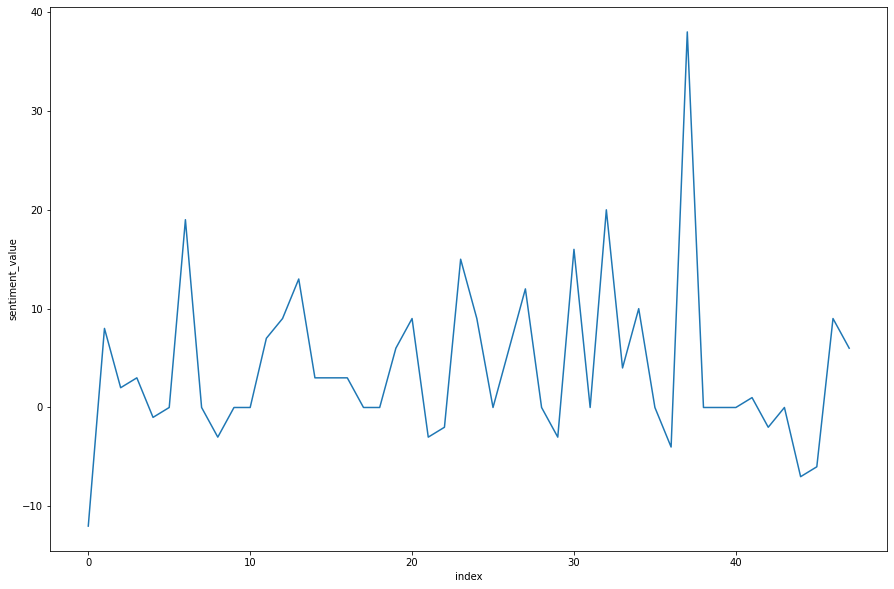

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

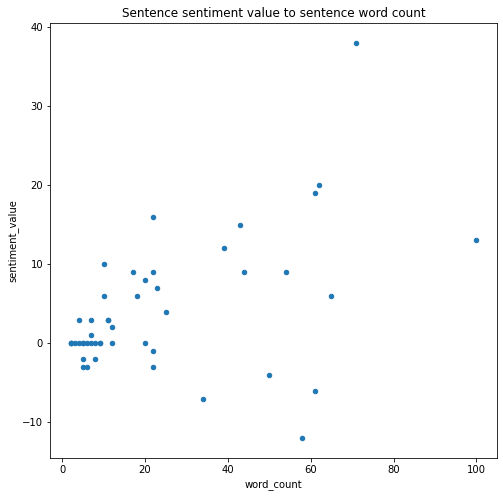

In [162]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), 
                     title='Sentence sentiment value to sentence word count')

From this we can infer that most of the word count are between 0 to 20 and sentiment value between -5 to 10. There are outlier also but they also have high sentiment value